In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox

In [2]:
wine_dataset = pd.read_csv('../Datasets/winequality-red.csv')

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Exploratory Data Analysis

In [5]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset.shape

(1599, 12)

In [8]:
wine_dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
wine_dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
X = wine_dataset.iloc[:,:-1]
y = wine_dataset.iloc[:,[-1]]

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
def plotFeatures(dataset, feature):
  plt.figure(figsize=(12,6))
  plt.title(feature + ": " + isGaussian(feature))
  sns.distplot(dataset[feature])

In [19]:
def isGaussian(feature):
  _ , pValue = shapiro(wine_dataset[feature])
  if pValue < .05 : return "Is Gaussian"
  else : return "Not Gaussian"

In [20]:
for feature in X.columns:
  print(feature + ": ", isGaussian(feature))

fixed acidity:  Is Gaussian
volatile acidity:  Is Gaussian
citric acid:  Is Gaussian
residual sugar:  Is Gaussian
chlorides:  Is Gaussian
free sulfur dioxide:  Is Gaussian
total sulfur dioxide:  Is Gaussian
density:  Is Gaussian
pH:  Is Gaussian
sulphates:  Is Gaussian
alcohol:  Is Gaussian


In [21]:
wine_dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

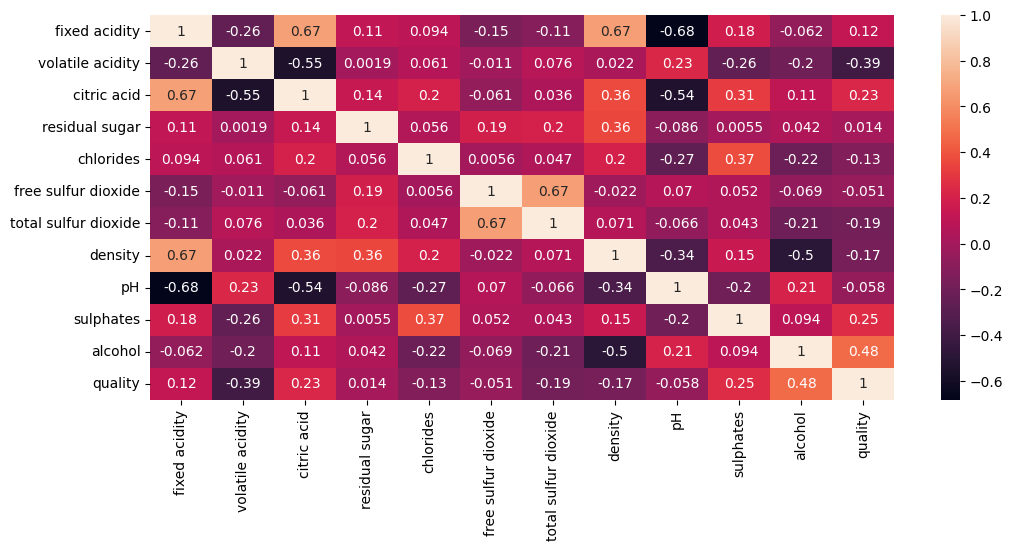

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(wine_dataset.corr(), annot=True)

In [23]:
features_to_drop = ['residual sugar','free sulfur dioxide','pH']

In [24]:
wine_dataset_cleaned = wine_dataset.drop(features_to_drop, axis =1)

In [25]:
wine_dataset_cleaned.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


<Axes: >

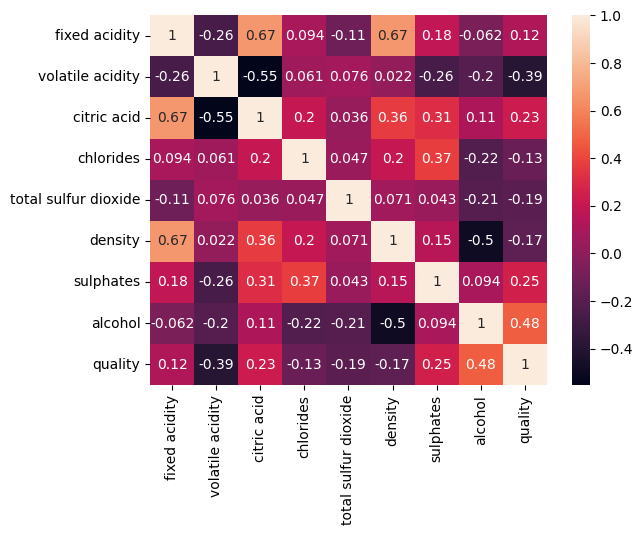

In [26]:
sns.heatmap(wine_dataset_cleaned.corr(), annot=True)

In [27]:
def find_outliers(dataset, feature):
  outliers = []
  mean = np.mean(dataset[feature])
  std = np.std(dataset[feature])
  q1, q3 = np.percentile(dataset,[25,75])
  IQR = q3- q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  for data_value in dataset[feature]:
    point = (data_value-mean)/std
    
    if lower_bound > point > upper_bound : 
      outliers.append(data_value)

  print("For the feature {}, there are {} outliers".format(feature,len(outliers)))

In [28]:
X_cleaned = wine_dataset_cleaned.drop('quality', axis=1)

In [29]:
for feature in X_cleaned.columns:
  find_outliers(X_cleaned, feature)

For the feature fixed acidity, there are 0 outliers
For the feature volatile acidity, there are 0 outliers
For the feature citric acid, there are 0 outliers
For the feature chlorides, there are 0 outliers
For the feature total sulfur dioxide, there are 0 outliers
For the feature density, there are 0 outliers
For the feature sulphates, there are 0 outliers
For the feature alcohol, there are 0 outliers


/var/folders/vq/4kkwps6x1vq3p_dns9q4bng00000gn/T/ipykernel_47036/238034069.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature])
/var/folders/vq/4kkwps6x1vq3p_dns9q4bng00000gn/T/ipykernel_47036/238034069.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature])
/var/f

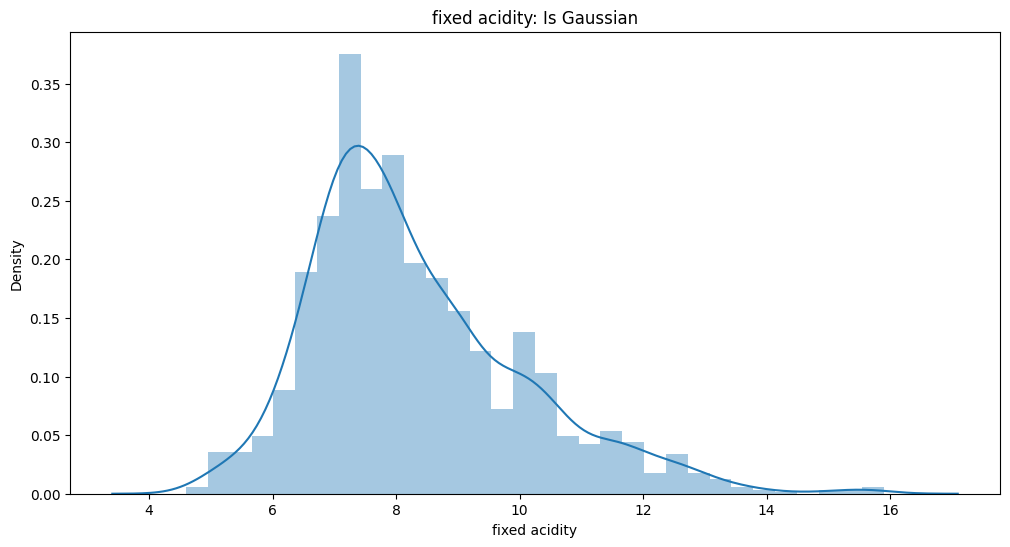

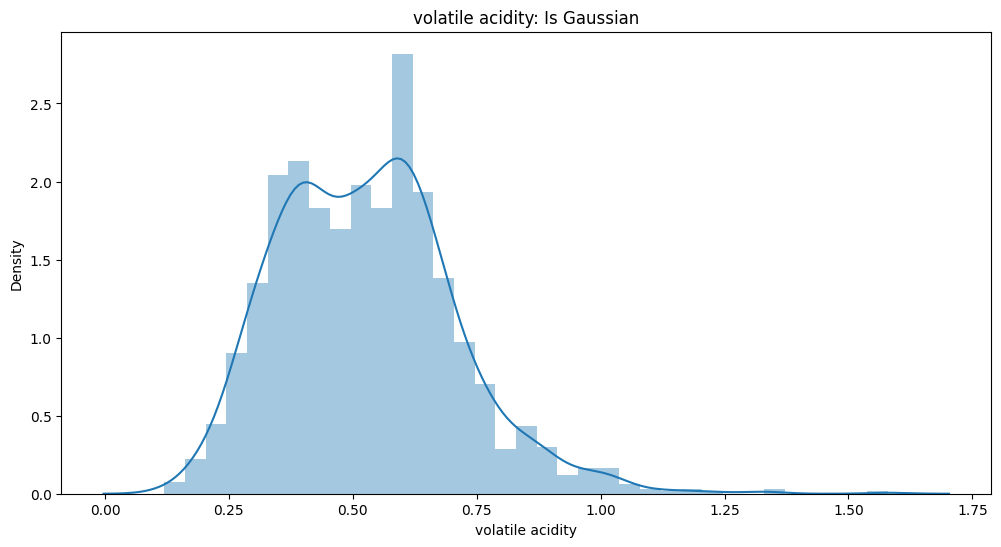

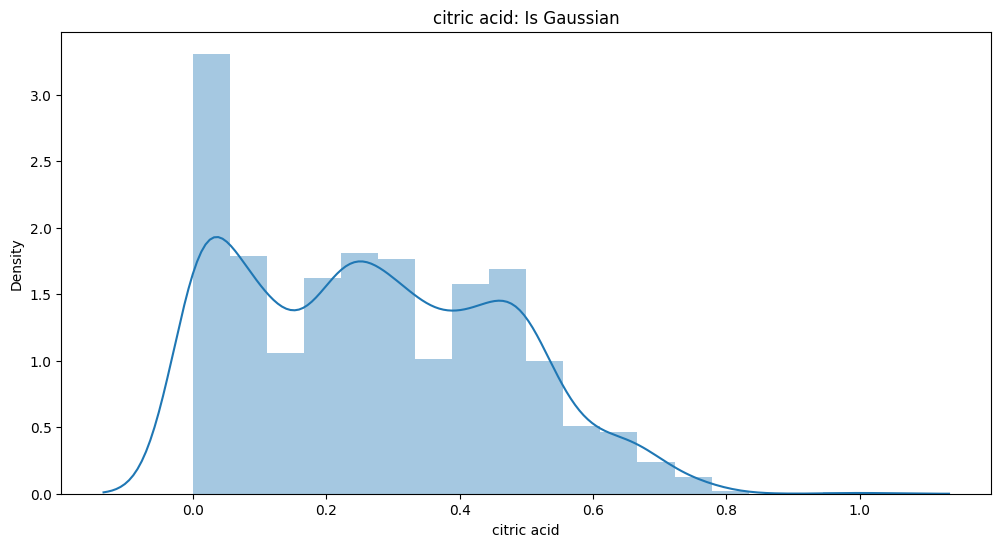

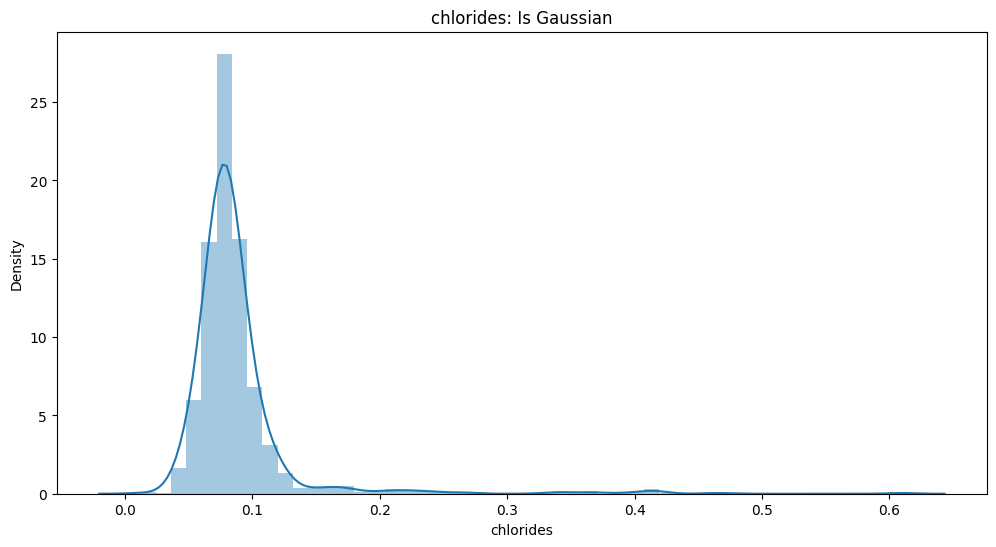

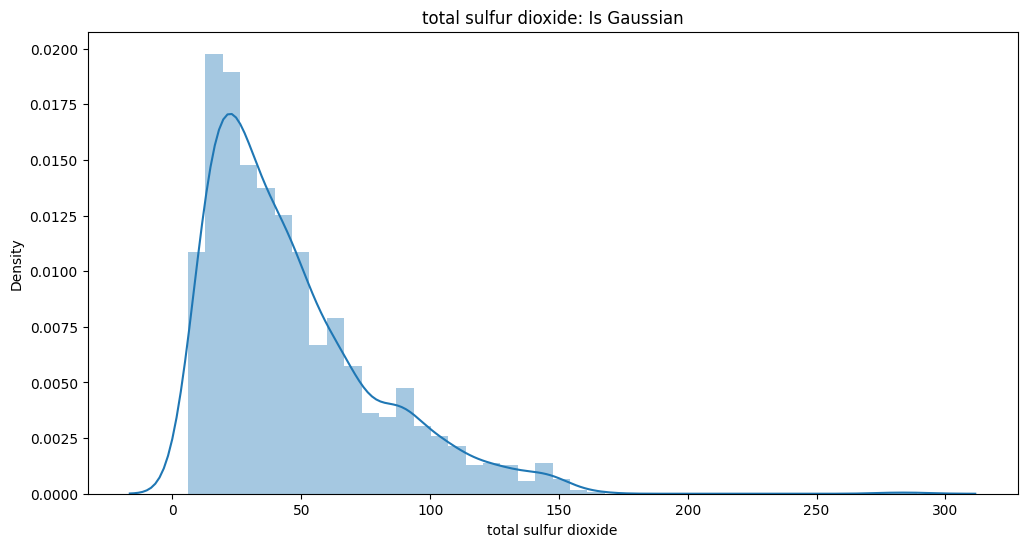

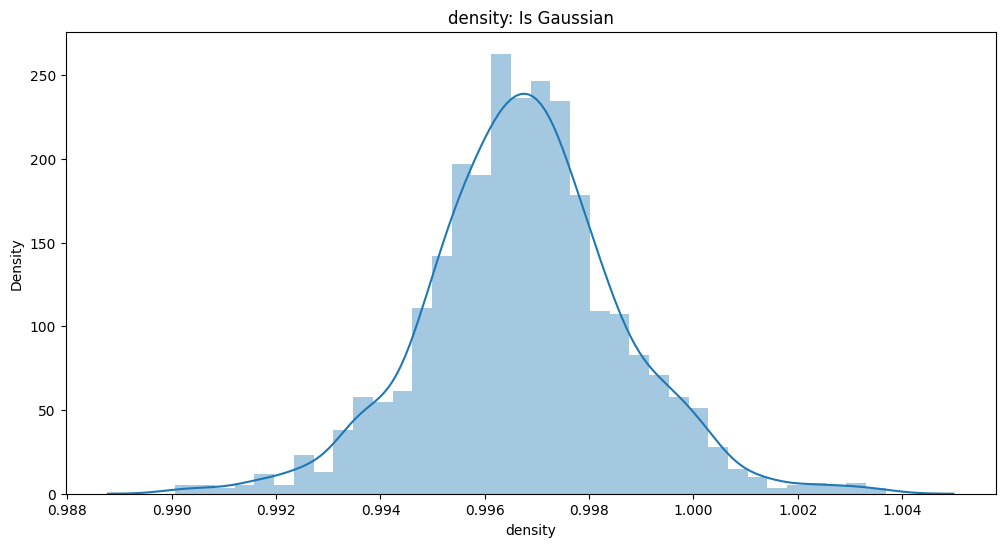

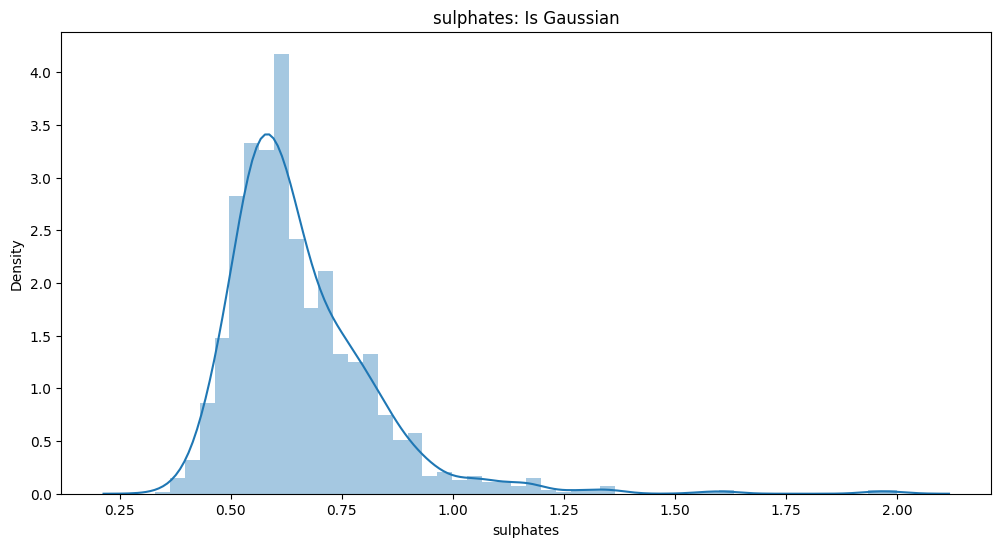

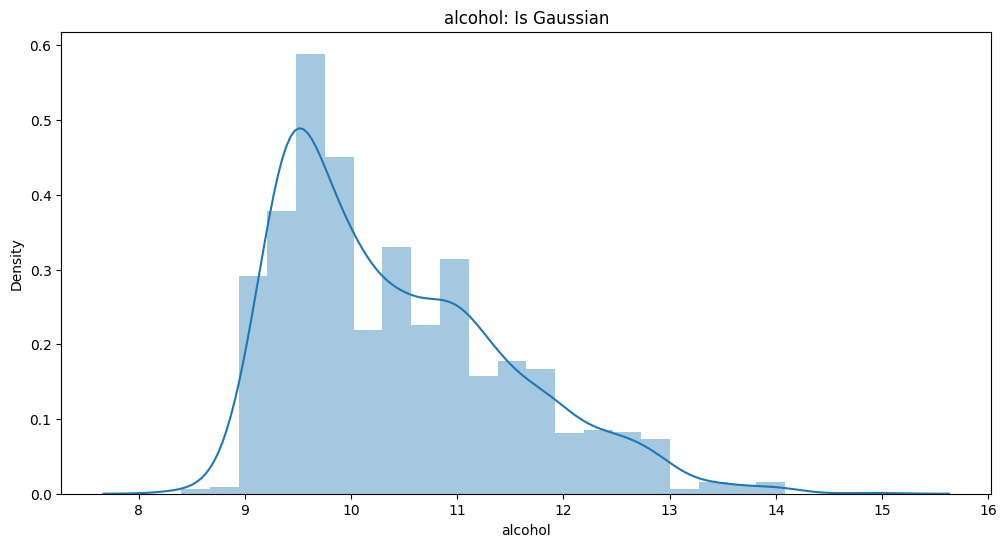

In [31]:
for feature in X_cleaned.columns:
  plotFeatures(X_cleaned,feature)

## 3.a) Conclusions :
### 1.) All the features are gaussian distributed.
### 2.) The following three features were not correlated with the target feature : ['residual sugar', 'free sulfur dioxide', 'pH']

# 2.) Model Creation

In [32]:
X_cleaned.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(X_cleaned)
X_scaled = pd.DataFrame(scaledData, columns=X_cleaned.columns)

In [35]:
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.223875,0.624363,0.028261,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,0.096353,0.229047,0.134264,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.264960,0.411500,0.664277,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246


In [36]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=.33, random_state=100, stratify=y)

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
predictions = linear_model.predict(X_test)

In [39]:
from sklearn import metrics

In [40]:
metrics.mean_squared_error(y_test,predictions)

0.4170097319267631

In [41]:
metrics.r2_score(y_test,predictions)

0.3554959468595701

In [42]:
linear_model.coef_

array([[ 5.88377844e-02, -1.40003869e+00, -4.06739679e-01,
        -1.36792780e+00, -1.42765874e-03, -2.77826271e+01,
         9.08289761e-01,  2.55118135e-01]])

In [43]:
import math

In [44]:
randomNumber = np.random.randint(0,1599)
testData = X_scaled.iloc[randomNumber]
trueValue  = y.iloc[randomNumber]

predicted = linear_model.predict([testData])

print('jwvjwevb', predicted)
print('True Value: ', trueValue)
print('Predicted Value: ', round(predicted.flatten()[0]))

jwvjwevb [[59.85835938]]
True Value:  quality    6
Name: 1324, dtype: int64
Predicted Value:  60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [47]:
metrics.mean_squared_error(y_test,predictions)

0.33782954545454547

In [48]:
metrics.r2_score(y_test,predictions)

0.4778718704956203

In [49]:
randomNumber = np.random.randint(0,1599)
testData = X_scaled.iloc[randomNumber]
trueValue  = y.iloc[randomNumber]

predicted = rf_model.predict([testData])

print('jwvjwevb', predicted)
print('True Value: ', trueValue)
print('Predicted Value: ', round(predicted.flatten()[0]))

jwvjwevb [3.98]
True Value:  quality    6
Name: 211, dtype: int64
Predicted Value:  4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
